In [1]:
# data=> german credit data
# source => https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# !pip install ucimlrepo

In [60]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
x = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 


In [61]:
x;

In [62]:
x.columns

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20'],
      dtype='object')

In [63]:
x.columns = ['Status_Checking', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount', 'Savings',
           'Employment', 'Installment_Rate', 'Sex_Marital', 'Guarantors', 'Residence_Duration',
           'Property', 'Age', 'Installment_Plans', 'Housing', 'Existing_Credits', 'Job',
           'Num_People_Maintained', 'Telephone', 'Foreign_Worker']

In [64]:
x

,Status_Checking,Duration,Credit_History,Purpose,Credit_Amount,Savings,Employment,Installment_Rate,Sex_Marital,Guarantors,Residence_Duration,Property,Age,Installment_Plans,Housing,Existing_Credits,Job,Num_People_Maintained,Telephone,Foreign_Worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [70]:
y = y.values.flatten()
# 1 -> good, 2-> bad

In [72]:
y.shape

(1000,)

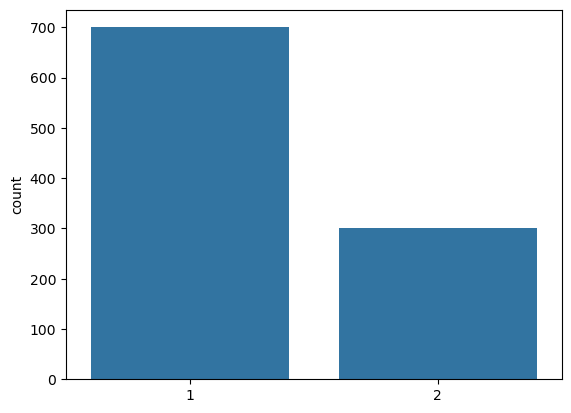

In [74]:
sns.countplot(x = y);

In [76]:
# check unique values

In [78]:
x.dtypes

Status_Checking          object
Duration                  int64
Credit_History           object
Purpose                  object
Credit_Amount             int64
Savings                  object
Employment               object
Installment_Rate          int64
Sex_Marital              object
Guarantors               object
Residence_Duration        int64
Property                 object
Age                       int64
Installment_Plans        object
Housing                  object
Existing_Credits          int64
Job                      object
Num_People_Maintained     int64
Telephone                object
Foreign_Worker           object
dtype: object

In [82]:
for col in x.columns:
    if x[col].dtype == "object":
        print(f"**unique values in {col} => {x[col].value_counts()} \n")

**unique values in Status_Checking => A14    394
A11    274
A12    269
A13     63
Name: Status_Checking, dtype: int64 

**unique values in Credit_History => A32    530
A34    293
A33     88
A31     49
A30     40
Name: Credit_History, dtype: int64 

**unique values in Purpose => A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: Purpose, dtype: int64 

**unique values in Savings => A61    603
A65    183
A62    103
A63     63
A64     48
Name: Savings, dtype: int64 

**unique values in Employment => A73    339
A75    253
A74    174
A72    172
A71     62
Name: Employment, dtype: int64 

**unique values in Sex_Marital => A93    548
A92    310
A94     92
A91     50
Name: Sex_Marital, dtype: int64 

**unique values in Guarantors => A101    907
A103     52
A102     41
Name: Guarantors, dtype: int64 

**unique values in Property => A123    332
A121    282
A122    232
A124    154
Name: Property, dtype: int64 

**unique va

In [84]:
# ohe

In [86]:
x_encoded = pd.get_dummies(x, drop_first= True)

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, random_state= 42,
                                                   test_size= 0.20)

In [90]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [92]:
y_pred = gnb.predict(x_test)

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

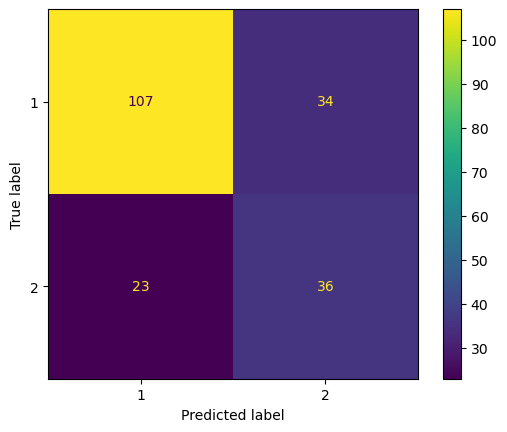

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.76      0.79       141
           2       0.51      0.61      0.56        59

    accuracy                           0.71       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.73      0.71      0.72       200



In [100]:
accuracy_score(y_test, y_pred)

0.715